## Validate Code using Bipolar

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn-poster')
lines = ["-","--","-.",":", "o", "v", "d", "^", "<", ">", "1", "2", "3", "4", "s", "p", "*"]

# path = sys.argv

# folder = str(path[1])
# filename = str(path[2])


Import data

In [3]:
%%bash
tree ../gxx/bipolar

../gxx/bipolar
├── ih
│   ├── neutrino-headon-bipolar-ih
│   ├── neutrino-headon-bipolar-ih-range-1-refl-0.0-mu-0.5-100000-100000-22.record
│   ├── neutrino-headon-bipolar-ih-range-1-refl-0.0-mu-10.0-100000-100000-22.record
│   ├── neutrino-headon-bipolar-ih-range-1-refl-0.0-mu-20.0-100000-100000-22.record
│   ├── neutrino-headon-bipolar-ih-range-1-refl-0.0-mu-4.0-100000-100000-22.record
│   ├── neutrino-headon-bipolar-ih-range-1-refl-0.1-mu-0.5-100000-100000-22.record
│   ├── neutrino-headon-bipolar-ih-range-1-refl-0.1-mu-10.0-100000-100000-22.record
│   ├── neutrino-headon-bipolar-ih-range-1-refl-0.1-mu-20.0-100000-100000-22.record
│   ├── neutrino-headon-bipolar-ih-range-1-refl-0.1-mu-4.0-100000-100000-22.record
│   ├── neutrino-headon-bipolar-ih-range-5-refl-0.0-mu-0.5-500000-500000-22.record
│   ├── neutrino-headon-bipolar-ih-range-5-refl-0.0-mu-10.0-500000-500000-22.record
│   ├── neutrino-headon-bipolar-ih-range-5-refl-0.0-mu-20.0-500000-500000-22.record
│   ├── neutrino-headon-

In [4]:
data = np.genfromtxt('../gxx/bipolar/ih/neutrino-headon-nunubar_MU_4.000000_REFL0.000000_ITER500000_STEPS500000_RANGE5.000000_TH_22_t2018-2-18-23-2-46.csv', delimiter = ", ")
print("Data Loaded")


Data Loaded


In [5]:
totlen = len(data)
lendata = int(len(data[0])/2)
seg = 10

xdata = data[0][:lendata:seg]
ydata = np.sqrt( data[-2][:lendata:seg]**2 + data[-1][:lendata:seg]**2 )
# ydata = data[-3][:lendata]

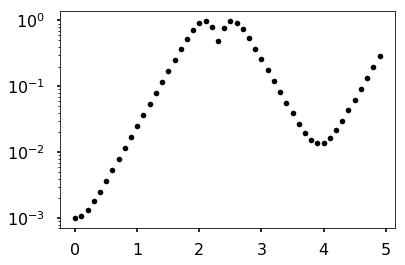

In [6]:
plt.semilogy( xdata, ydata, "k.", label='Numerical')
plt.show()

In [7]:
bgp = 7
edp = -6

slopefit,interceptfit = np.polyfit(xdata[bgp:edp], np.log(  ydata[bgp:edp] ) , 1)

print(slopefit,interceptfit)

-0.250469671154838 -1.589828771343517


In [101]:
omegav = -1
mu = 40
alpha = 1

slopeth = np.sqrt((1-alpha)**2 * mu**2 + 4 * (1 + alpha) * mu * omegav + 4* omegav**2 +0*1j) / 2
print(slopeth.imag)

8.88819441732


In [102]:
slopefit/slopeth.imag

0.68859718637092215

In [103]:
def fit(k, b, x):
    return k*x+b

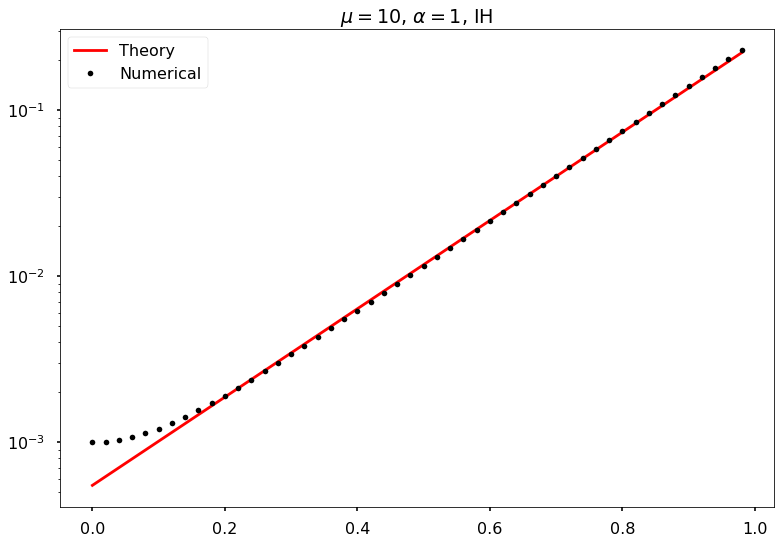

In [105]:
plt.semilogy( xdata, np.exp( fit(slopefit, interceptfit, xdata) ) , "r-", label="Theory")
plt.semilogy( xdata, ydata, "k.", label='Numerical')
plt.legend()
plt.title("$\mu=10$, $\\alpha=1$, IH")
plt.show()

In [10]:
test = np.array([1,2,3,4])

In [11]:
test[1:2]

array([2])